Dataset Shape: (200, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           200 non-null    int64  
 1   Name                  200 non-null    object 
 2   Age                   200 non-null    int64  
 3   Education             200 non-null    object 
 4   Skills                200 non-null    object 
 5   Interests             200 non-null    object 
 6   Recommended_Career    200 non-null    object 
 7   Recommendation_Score  200 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


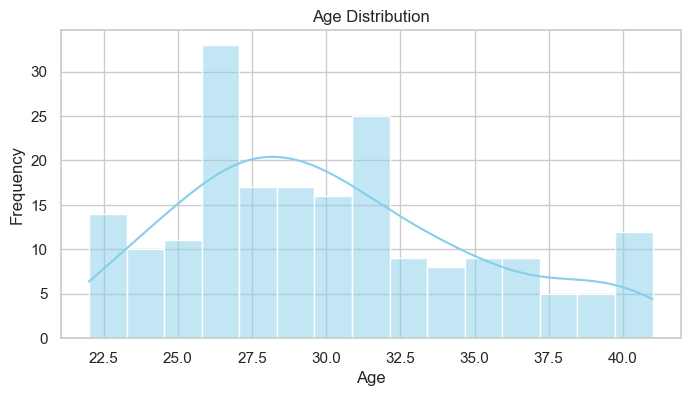

C:\Users\user\AppData\Local\Temp\ipykernel_8152\1510724572.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=data, palette="Set2")


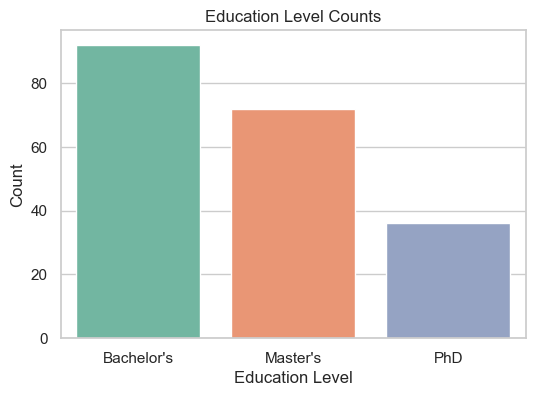

C:\Users\user\AppData\Local\Temp\ipykernel_8152\1510724572.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Recommended_Career", data=data, order=data["Recommended_Career"].value_counts().index, palette="Set3")


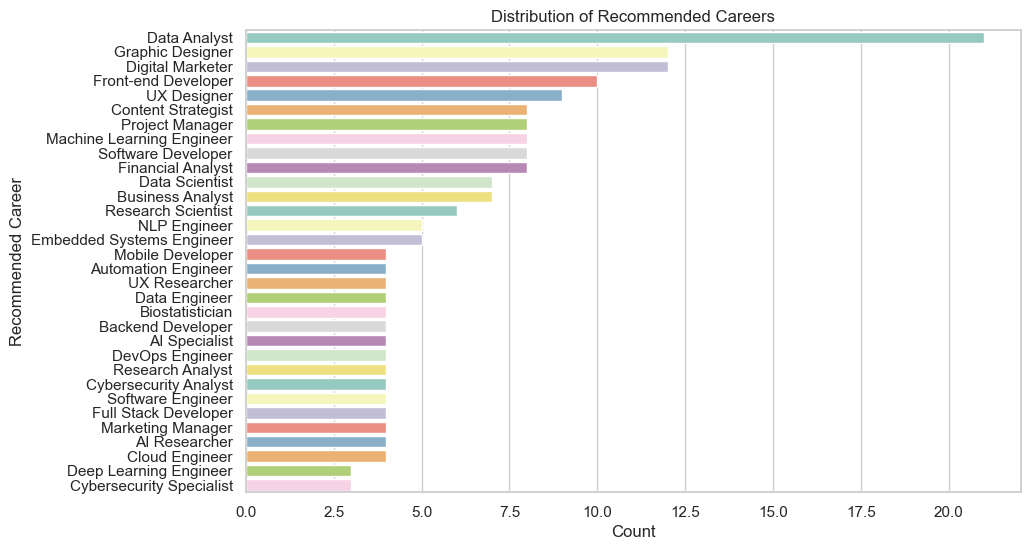

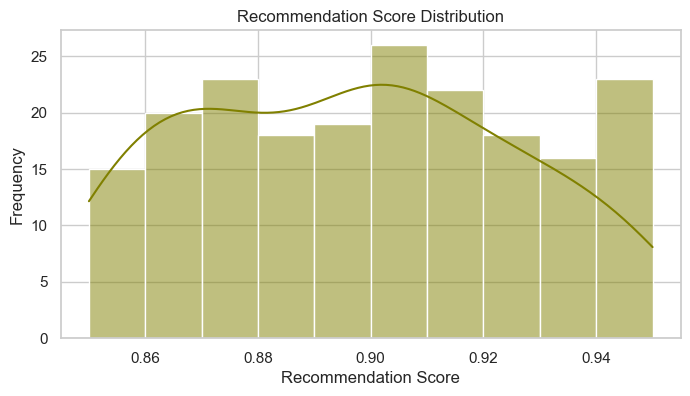

Most common skills:
 Python              75
Machine Learning    23
SEO                 20
JavaScript          19
Java                18
                    ..
Negotiation          1
Adobe Photoshop      1
UX Design            1
User Research        1
NLP                  1
Name: count, Length: 80, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8152\1510724572.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_count.index, y=skills_count.values, palette="viridis")


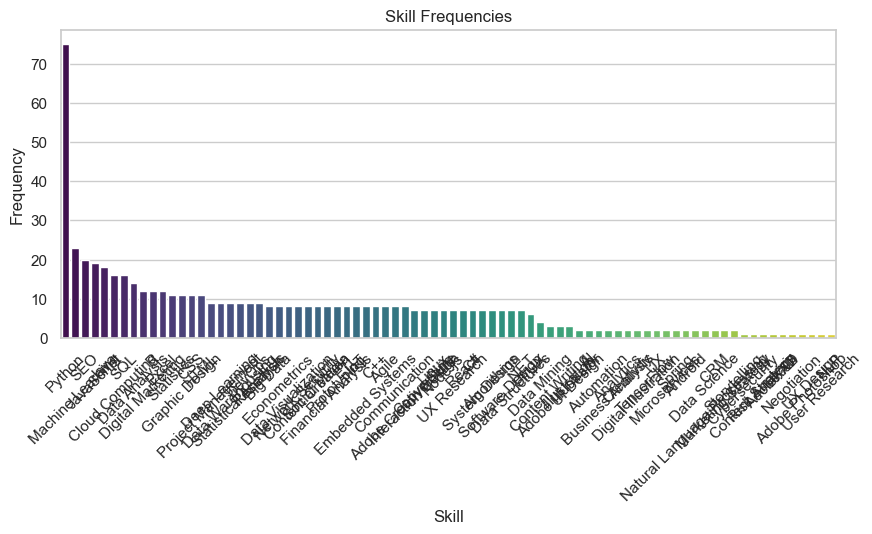

Most common interests:
 Technology              48
AI                      28
Business                28
Finance                 27
Design                  23
Marketing               23
Analytics               19
Data Science            16
Academia                16
Web Development         16
Arts                    16
Management              14
Healthcare              14
Research                13
Digital Media           13
Software Development    13
Communications          12
Cybersecurity           12
Biotech                  6
Data Analysis            5
Innovation               4
Electronics              3
Automation               3
Software Engineering     3
Statistics               2
Coding                   2
Social Media             2
Gaming                   2
Linguistics              2
Web Design               2
Content                  2
Engineering              2
Media                    2
Mobile Apps              2
User Experience          2
Security                 1
Data

C:\Users\user\AppData\Local\Temp\ipykernel_8152\1510724572.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interests_count.index, y=interests_count.values, palette="magma")


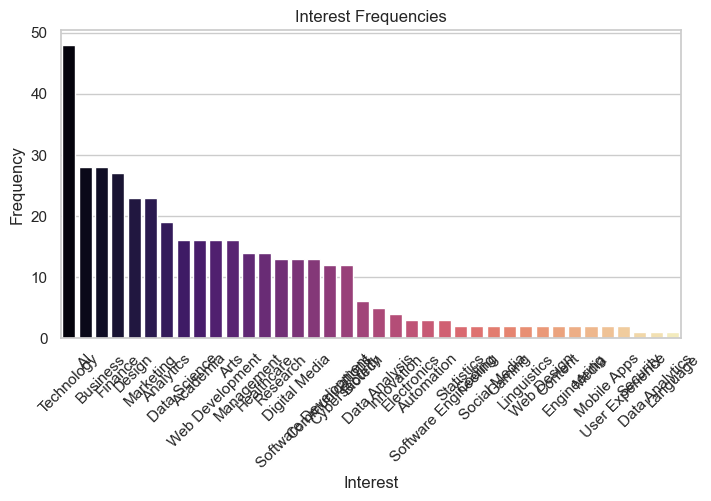

C:\Users\user\AppData\Local\Temp\ipykernel_8152\1510724572.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Education_enc'] = edu_encoder.fit_transform(features['Education'])
C:\Users\user\AppData\Local\Temp\ipykernel_8152\1510724572.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Text_Features'] = features['Skills'].fillna('') + " " + features['Interests'].fillna('')
C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'to

Shape of text features: (200, 150)
Feature matrix shape: (200, 152)
Target classes: ['AI Researcher' 'AI Specialist' 'Automation Engineer' 'Backend Developer'
 'Biostatistician' 'Business Analyst' 'Cloud Engineer'
 'Content Strategist' 'Cybersecurity Analyst' 'Cybersecurity Specialist'
 'Data Analyst' 'Data Engineer' 'Data Scientist' 'Deep Learning Engineer'
 'DevOps Engineer' 'Digital Marketer' 'Embedded Systems Engineer'
 'Financial Analyst' 'Front-end Developer' 'Full Stack Developer'
 'Graphic Designer' 'Machine Learning Engineer' 'Marketing Manager'
 'Mobile Developer' 'NLP Engineer' 'Project Manager' 'Research Analyst'
 'Research Scientist' 'Software Developer' 'Software Engineer'
 'UX Designer' 'UX Researcher']
Training set shape: (160, 152)
Testing set shape: (40, 152)


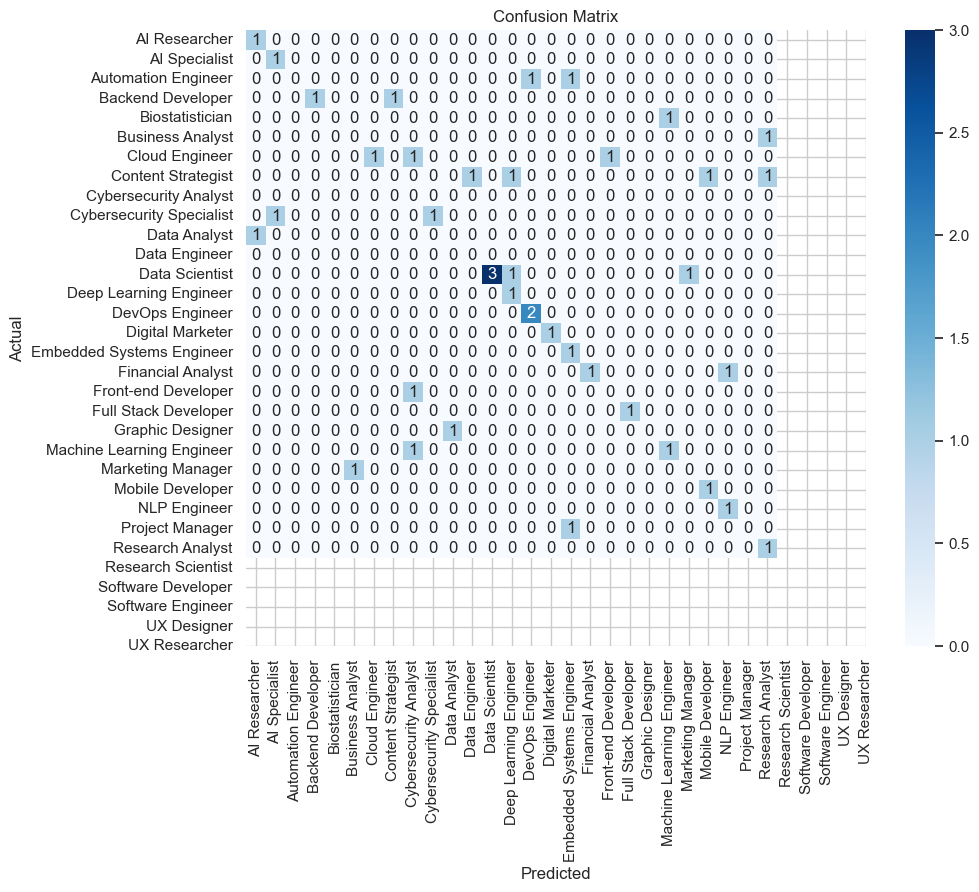

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Set style for seaborn
sns.set(style="whitegrid")

data = pd.read_csv("./AI-based Career Recommendation System.csv")
data.head()

print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

data.describe()

plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x="Education", data=data, palette="Set2")
plt.title("Education Level Counts")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y="Recommended_Career", data=data, order=data["Recommended_Career"].value_counts().index, palette="Set3")
plt.title("Distribution of Recommended Careers")
plt.xlabel("Count")
plt.ylabel("Recommended Career")
plt.show()


plt.figure(figsize=(8, 4))
sns.histplot(data['Recommendation_Score'], bins=10, kde=True, color="olive")
plt.title("Recommendation Score Distribution")
plt.xlabel("Recommendation Score")
plt.ylabel("Frequency")
plt.show()

# Function to split semicolon-separated values and count occurrences
def count_items(series):
    items = series.dropna().apply(lambda x: x.split(";"))
    flat_list = [item.strip() for sublist in items for item in sublist]
    return pd.Series(flat_list).value_counts()


# Count Skills
skills_count = count_items(data["Skills"])
print("Most common skills:\n", skills_count)


# Plot skills count
plt.figure(figsize=(10, 4))
sns.barplot(x=skills_count.index, y=skills_count.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Skill Frequencies")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.show()

# Count Interests
interests_count = count_items(data["Interests"])
print("Most common interests:\n", interests_count)

# Plot interests count
plt.figure(figsize=(8, 4))
sns.barplot(x=interests_count.index, y=interests_count.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Interest Frequencies")
plt.xlabel("Interest")
plt.ylabel("Frequency")
plt.show()

# Select features and target variable
features = data[['Age', 'Education', 'Skills', 'Interests']]
target = data['Recommended_Career']

edu_encoder = LabelEncoder()
features['Education_enc'] = edu_encoder.fit_transform(features['Education'])
features.head()


# Create a combined text column
features['Text_Features'] = features['Skills'].fillna('') + " " + features['Interests'].fillna('')

# Use CountVectorizer for text feature extraction
vectorizer = CountVectorizer(tokenizer=lambda x: [item.strip() for item in x.split(";") if item.strip()], 
                             lowercase=True)
text_features = vectorizer.fit_transform(features['Text_Features'])

print("Shape of text features:", text_features.shape)

# Create a numeric matrix from Age and Education_enc
numeric_features = features[['Age', 'Education_enc']].values

# hstack to combine the numeric features with the text features

X = hstack([sparse.csr_matrix(numeric_features), text_features])

# Encode target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(target)

print("Feature matrix shape:", X.shape)
print("Target classes:", target_encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()